# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [ ]:
env = UnityEnvironment(file_name="C:/Users/tonys/deep-reinforcement-learning/p3_collab-compet/Tennis_Windows_x86_64/Tennis.exe")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch


import time
from collections import deque
import random
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="C:/Users/tonys/deep-reinforcement-learning/p3_collab-compet/Tennis_Windows_x86_64/Tennis.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
states = env_info.vector_observations
print(action_size)
state_size = states.shape[1]
print(state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


2
24


Episodes 0010	Max Reward: 0.1000	Average: 0.0100
Episodes 0020	Max Reward: 0.0000	Average: 0.0050
Episodes 0030	Max Reward: 0.0000	Average: 0.0033
Episodes 0040	Max Reward: 0.0000	Average: 0.0025
Episodes 0050	Max Reward: 0.0000	Average: 0.0020
Episodes 0060	Max Reward: 0.1000	Average: 0.0033
Episodes 0070	Max Reward: 0.0000	Average: 0.0029
Episodes 0080	Max Reward: 0.2000	Average: 0.0075
Episodes 0090	Max Reward: 0.1000	Average: 0.0078
Episodes 0100	Max Reward: 0.1000	Average: 0.0080
Episodes 0110	Max Reward: 0.0000	Average: 0.0070
Episodes 0120	Max Reward: 0.2000	Average: 0.0130
Episodes 0130	Max Reward: 0.1000	Average: 0.0160
Episodes 0140	Max Reward: 0.1000	Average: 0.0190
Episodes 0150	Max Reward: 0.1000	Average: 0.0210
Episodes 0160	Max Reward: 0.2000	Average: 0.0260
Episodes 0170	Max Reward: 0.1000	Average: 0.0310
Episodes 0180	Max Reward: 0.3000	Average: 0.0350
Episodes 0190	Max Reward: 0.1000	Average: 0.0380
Episodes 0200	Max Reward: 0.2000	Average: 0.0440
Episodes 0210	Max Re

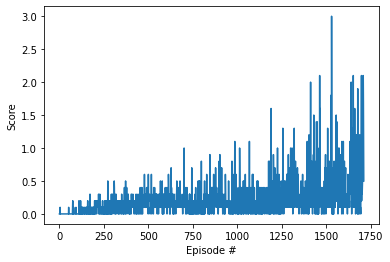

In [2]:
num_agents=2
from maddpg_agent import Agent
print_every=10
player0 = Agent(state_size, action_size, player=0, random_seed=1)
player1 = Agent(state_size, action_size, player=1, random_seed=1)
def maddpg(n_episodes=2000):
    best_score = 0
    scores_deque = deque(maxlen=100)
    scores_lst = []
    avg_score = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]        
        states = np.reshape(env_info.vector_observations, (1, -1))  
        player0.reset()
        player1.reset()
        scores = np.zeros(num_agents)
        while True:               
       
            actions = np.concatenate((player0.act(states), player1.act(states)), axis=0).flatten()
            
            env_info = env.step(actions)[brain_name]           
            next_states = np.reshape(env_info.vector_observations, (1, -1))  
            rewards = env_info.rewards                       
            dones = env_info.local_done                        
            player0.step(states, actions, rewards[0], next_states, dones[0]) 
            player1.step(states, actions, rewards[1], next_states, dones[1]) 
            scores += np.max(rewards)                          
            states = next_states                               
            if np.any(dones):                                   
                break
        epi_best_score = np.max(scores)
        scores_lst.append(epi_best_score)
        scores_deque.append(epi_best_score)
        avg_score.append(np.mean(scores_deque))

        # print results
        if i_episode % print_every == 0:
            print('Episodes {:0>4d}\tMax Reward: {:.4f}\tAverage: {:.4f}'.format(i_episode, np.max(scores_lst[-print_every:]), avg_score[-1]))
            
        
        
        if i_episode >= 100 and avg_score[-1]>= 0.5:
            print('\n Solved in Episode {:0>4d}\t Score: {:.4f}\tMoving Avgs Score: {:.4f}'\
                  .format(i_episode, epi_best_score, avg_score[-1]))
            torch.save(player0.actor_local.state_dict(),'checkpoint_player0_actor.pt')
            torch.save(player0.critic_local.state_dict(),'checkpoint_player0_critic.pt')
            torch.save(player1.actor_local.state_dict(),'checkpoint_player1_actor.pt')
            torch.save(player1.critic_local.state_dict(), 'checkpoint_player1_critic.pt')                                               
            break       
            
    return scores_lst, avg_score

scores, avg_s = maddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()